### Esercitazione 1 - Recupero serie storiche tramite MetaTrader5
#### Argomenti

* recupero serie storiche da un provider dati (ActivTrades)
* analisi struttura OHLC e OHLCV
* analisi statistica iniziale dataset
* check tempo di esecuzione snippet di codice

In [1]:
import pandas as pd
import MetaTrader5 as mt5  # pip install MetaTrader5
import mplfinance as mpf  # pip install mplfinance
from datetime import datetime

In [2]:
connected = mt5.initialize(login=5776609, server="ActivTrades-Server", password='YDSNcmto')

if connected:
    candles = pd.DataFrame(mt5.copy_rates_from_pos('EURUSD', mt5.TIMEFRAME_H1, 0, 50000))
    mt5.shutdown()
else:
    print('MT5 account error.')

In [3]:
candles.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,1411736400,1.27431,1.27438,1.27249,1.27318,4269,2,0
1,1411740000,1.27317,1.27398,1.27105,1.27136,7834,2,0
2,1411743600,1.27133,1.27283,1.26890,1.26964,9432,2,0
3,1411747200,1.26970,1.27034,1.26780,1.26958,8660,2,0
4,1411750800,1.26955,1.27014,1.26817,1.26853,4583,2,0


In [4]:
# creazione di un indice temporale tramite
# la conversione della colonna [time] in datetime

candles['time'] = pd.to_datetime(candles['time'], unit='s')
candles.set_index('time', inplace=True)

candles.head()

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2014-09-26 13:00:00,1.27431,1.27438,1.27249,1.27318,4269,2,0
2014-09-26 14:00:00,1.27317,1.27398,1.27105,1.27136,7834,2,0
2014-09-26 15:00:00,1.27133,1.27283,1.26890,1.26964,9432,2,0
2014-09-26 16:00:00,1.26970,1.27034,1.26780,1.26958,8660,2,0
2014-09-26 17:00:00,1.26955,1.27014,1.26817,1.26853,4583,2,0


In [5]:
# ristrutturazione dataset

candles['volume'] = candles['tick_volume']
candles.drop('tick_volume', axis=1, inplace=True)
candles.drop('real_volume', axis=1, inplace=True)
candles.drop('spread', axis=1, inplace=True)

candles.head()

,open,high,low,close,volume
time,,,,,
2014-09-26 13:00:00,1.27431,1.27438,1.27249,1.27318,4269
2014-09-26 14:00:00,1.27317,1.27398,1.27105,1.27136,7834
2014-09-26 15:00:00,1.27133,1.27283,1.26890,1.26964,9432
2014-09-26 16:00:00,1.26970,1.27034,1.26780,1.26958,8660
2014-09-26 17:00:00,1.26955,1.27014,1.26817,1.26853,4583


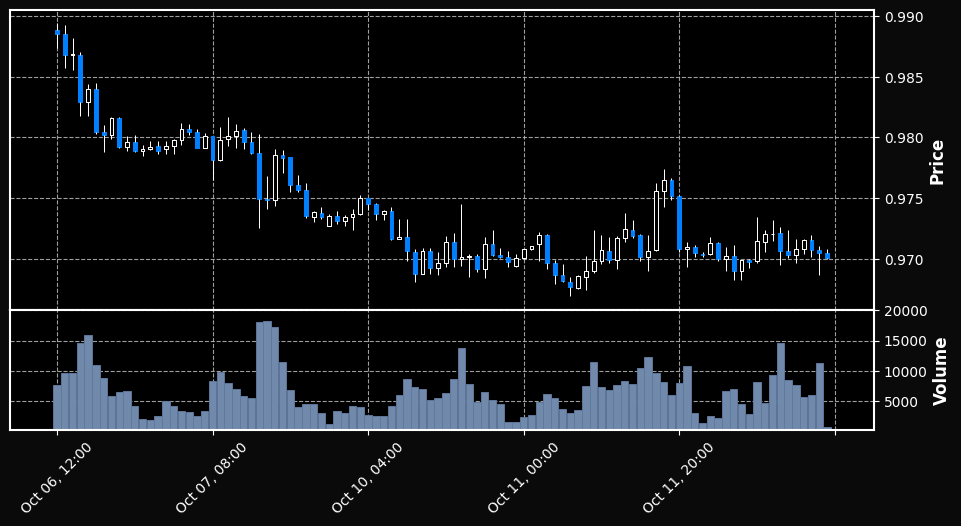

In [8]:
# visualizzazione grafico a candele e volumi

mpf.plot(candles[-100:], style='mike', type='candle', volume=True, figsize=(12, 6))

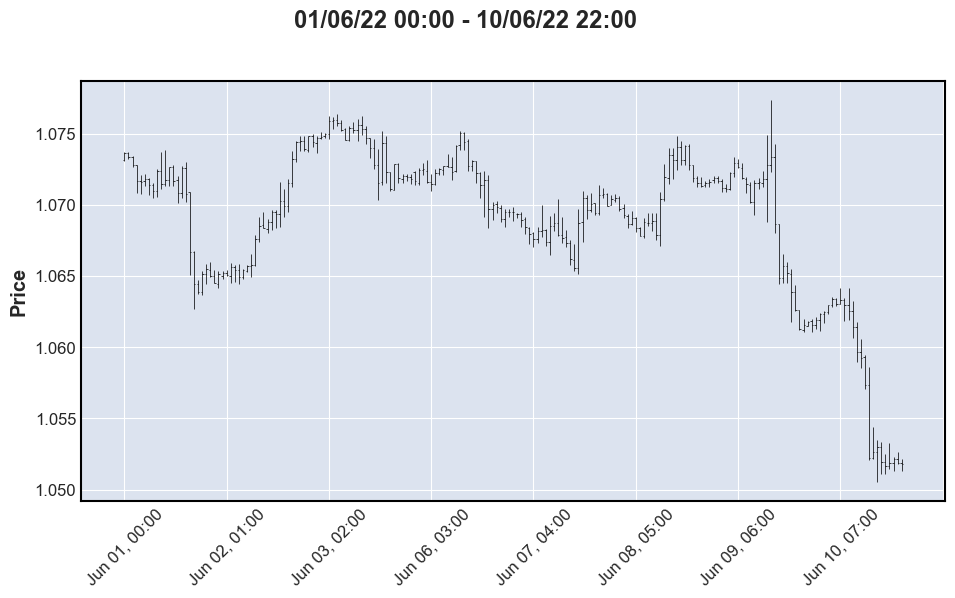

In [9]:
# selezione intervallo di 10 giorni

giugno_2022 = candles['2022-06-01':'2022-06-10'].copy()

data_start = giugno_2022.index[0].strftime('%d/%m/%y %H:%M')
data_end = giugno_2022.index[-1].strftime('%d/%m/%y %H:%M')

mpf.plot(giugno_2022, figsize=(12, 6), title=data_start + ' - ' + data_end)

In [10]:
# informazioni sul dataset

candles.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2014-09-26 13:00:00 to 2022-10-12 15:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    50000 non-null  float64
 1   high    50000 non-null  float64
 2   low     50000 non-null  float64
 3   close   50000 non-null  float64
 4   volume  50000 non-null  uint64 
dtypes: float64(4), uint64(1)
memory usage: 3.3 MB


In [11]:
# analisi distribuzione statistica livelli di prezzo e volumi

candles.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,50000.0,1.134832,0.055045,0.95388,1.101047,1.129370,1.175850,1.28400
high,50000.0,1.135620,0.054991,0.95590,1.101750,1.130070,1.176532,1.28869
low,50000.0,1.134060,0.055092,0.95351,1.100330,1.128605,1.175152,1.28295
close,50000.0,1.134827,0.055046,0.95386,1.101058,1.129360,1.175850,1.28399
volume,50000.0,4246.876780,3690.784109,1.00000,1826.750000,3304.000000,5547.000000,92768.00000


In [12]:
# verifica prezzo medio di chiusura in H1 su 3 mesi
# sfruttando l'output del metodo [describe()]

for mese in range(3, 6):
    print(
        'mese:', mese,
        'media prezzo chiusura H1:',
        candles[(candles.index.year == 2022) & (candles.index.month == mese)].describe()['close']['mean']
    )

mese: 3 media prezzo chiusura H1: 1.101845670289855
mese: 4 media prezzo chiusura H1: 1.081600874751491
mese: 5 media prezzo chiusura H1: 1.0574481852551985


In [13]:
# verifica prezzo medio di chiusura in H1 su 3 mesi
# con codice ad hoc (esecuzione più veloce)

for mese in range(3, 6):
    print(
        'mese:', mese,
        'media prezzo chiusura H1:',
        candles[(candles.index.year == 2022) & (candles.index.month == mese)]['close'].mean()
    )

mese: 3 media prezzo chiusura H1: 1.101845670289855
mese: 4 media prezzo chiusura H1: 1.081600874751491
mese: 5 media prezzo chiusura H1: 1.0574481852551985


In [14]:
# check velocità esecuzione

data = []
start_time = datetime.now()
for i in range(100):
    for mese in range(3, 6):
        data.append(candles[(candles.index.year == 2022) & (candles.index.month == mese)].describe()['close']['mean'])
describe_time = datetime.now() - start_time

data = []
start_time = datetime.now()
for i in range(100):
    for mese in range(3, 6):
        data.append(candles[(candles.index.year == 2022) & (candles.index.month == mese)]['close'].mean())
ad_hoc_time = datetime.now() - start_time

print('tempo di esecuzione tramite metodo describe():', describe_time)
print('tempo di esecuzione tramite metodo ad hoc    :', ad_hoc_time)

tempo di esecuzione tramite metodo describe(): 0:00:08.636944
tempo di esecuzione tramite metodo ad hoc    : 0:00:03.703003
